# Heart Disease Prediction

A) Models Tested:
  1. Random Forest
  2. KNN
  3. SVM

B) Hyperparameter Tuning with : GirdSearchCV

C) Compared the models using mean of cross_val_score

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [156]:
import pickle

In [157]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [159]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [160]:
#check null
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

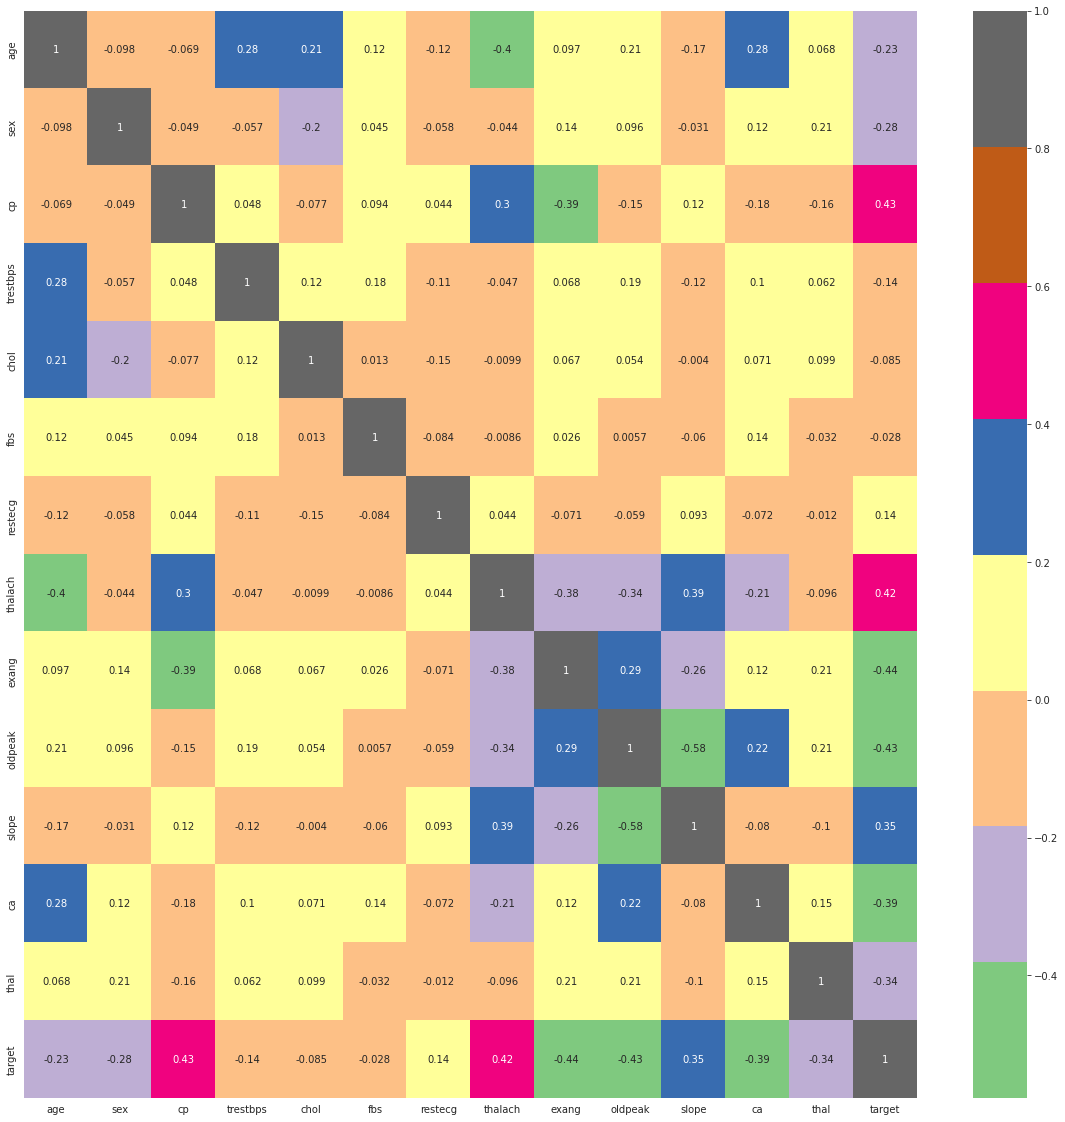

In [161]:
#feature selection, checking correlated features
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Accent)

Observation: There is no significant amount of correlation between any 2 variables.

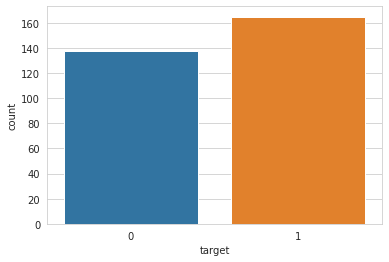

In [162]:
#checking if the dataset is balanced
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

Observation: Dataset is balanced

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e8fb7f4d0>,
      dtype=object)

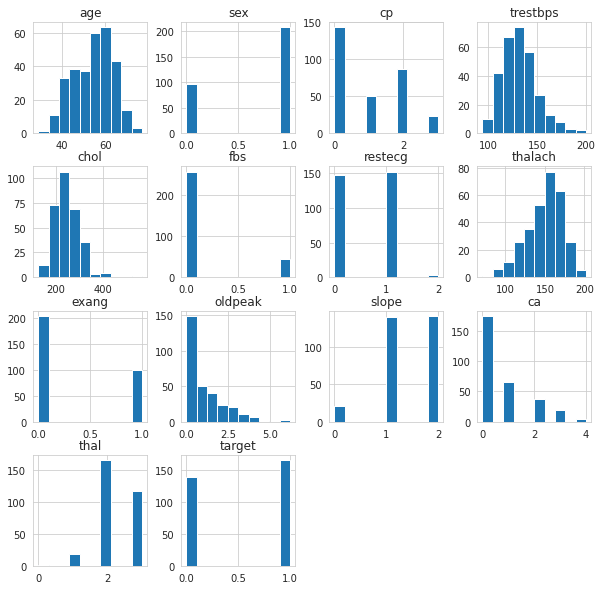

In [163]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax=ax)

Observation: categorical features present

In [164]:
# changing categorical variables to dummy variables
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [175]:
model=[]
acc=[]

# **1. Random Forest**

1. choosing best hyperparameters (no feature scaling required)

In [166]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [167]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [168]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [169]:
rf_Model = RandomForestClassifier()

In [170]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [171]:
rf_Grid.fit(X, y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   25.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   41.2s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   57.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [172]:
rf_Grid.best_params_


{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 33}

In [173]:
rf_model = RandomForestClassifier(bootstrap=False, max_depth=2, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=17)

2. Cross Validation

In [176]:
scores = cross_val_score(rf_model, X, y, cv=10)
acc.append(scores.mean())
model.append('Random Forest Classifier')
scores

array([0.83870968, 0.80645161, 0.87096774, 0.83333333, 0.83333333,
       0.86666667, 0.76666667, 0.76666667, 0.76666667, 0.83333333])

**Saving Random Forest Model**

In [178]:
with open('random_forst.pkl', 'wb') as f:
  pickle.dump(rf_model, f)

# *Feature Scaling for KNN and SVM*

In [179]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scale_columns  = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[scale_columns] = standardScaler.fit_transform(dataset[scale_columns])

In [180]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [181]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

## 2. **KNN**

1. choosing best hyper parameters

In [182]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


In [183]:
#Use GridSearch
knn_grid = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=10, verbose=2, n_jobs = 4)

In [184]:
#Fit the model
knn_grid.fit(X,y)

Fitting 10 folds for each of 2842 candidates, totalling 28420 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 576 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 1388 tasks      | elapsed:   14.0s
[Parallel(n_jobs=4)]: Done 2520 tasks      | elapsed:   22.4s
[Parallel(n_jobs=4)]: Done 5136 tasks      | elapsed:   39.1s
[Parallel(n_jobs=4)]: Done 8696 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 12912 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 17768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 23280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 28420 out of 28420 | elapsed:  2.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [185]:
#Print The value of best Hyperparameters
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}

2. Cross Validation

In [186]:
knn_model = KNeighborsClassifier(leaf_size=1, n_neighbors=5, p=1)
scores = cross_val_score(knn_model, X, y, cv=10)
acc.append(scores.mean())
model.append('KNN')

**Saving KNN Model**

In [187]:
with open('knn.pkl', 'wb') as f:
  pickle.dump(knn_model, f)

# **3. SVM**

1. Hyper parameter tuning

In [188]:
hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf','poly', 'sigmoid']}

In [189]:
svc_grid = GridSearchCV(SVC(), hyperparameters, cv=10, verbose=2, n_jobs = 4)

In [190]:
svc_grid.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 168 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 946 tasks      | elapsed:   58.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  1.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [191]:
svc_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}

2. Cross Validation

In [192]:
svc_model=SVC(C=1, gamma=0.1, kernel = 'sigmoid')
scores=cross_val_score(svc_model, X, y, cv=10)

In [193]:
acc.append(scores.mean())
model.append('SVM')

**Saving SVM**

In [194]:
with open('svm.pkl', 'wb') as f:
  pickle.dump(svc_model, f)

# **Accuracy Comparision**

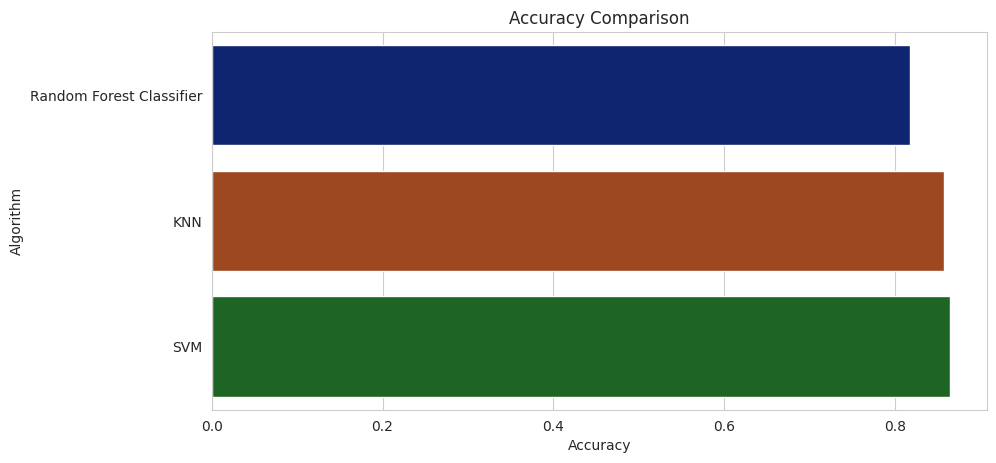

In [195]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [196]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Random Forest Classifier --> 0.8182795698924732
KNN --> 0.8581720430107527
SVM --> 0.8646236559139785
